# Big Data Tools for Business Project: Part 1

## Donald Trump Tweet Analysis

This part of the project is to analyze the content of the president of the United States Donald Trump on Twitter. I would like to find out what his conetent is about and what is popular and common.

In [1]:
import pyspark

In [2]:
sc = pyspark.SparkContext(appName = "Big Data Tools for Business Project Part 1")

In [3]:
# read the tweets

rdd_tweets = sc.textFile("trump_tweets.txt")

rdd_tweets.take(5)

['Republicans and Democrats have both created our economic problems.;02/08/2011 18:07:48',
 'I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y;03/03/2020 01:34:50',
 'RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…;17/01/2020 03:22:47',
 'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp  the Democrats know it. Almost all recent elections using this system, even though much smaller &amp   with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp  Fraud!;12/09/2020 20:10:58',
 "RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those 

## 1. Top Positive and Negative Words 

In [4]:
import re

# define a function to separate words with special characters

def split_with_multiple_separator(string_value):
    return re.split('#|,| |\[|\]', string_value.strip())

rdd_tweets_words = rdd_tweets.flatMap(split_with_multiple_separator) \
                             .filter(lambda word: word != '')

rdd_tweets_words.take(5)

['Republicans', 'and', 'Democrats', 'have', 'both']

In [5]:
# assign key and values to tweet words

rdd_tweets_words_kv = rdd_tweets_words.map(lambda word: (word, 1))

rdd_tweets_words_kv.take(5)

[('Republicans', 1), ('and', 1), ('Democrats', 1), ('have', 1), ('both', 1)]

### a. Extract Most Frequent Positive Words

We compare a file full of positive words with tweet content to find out which positive words are the most frequent.

In [6]:
# read the positive word file and assign key and values to the data

rdd_positive_words = sc.textFile('positive-words.txt')
rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [7]:
# join the positive word and tweet word data

rdd_positive_words_tweets_kv = rdd_tweets_words_kv.join(rdd_positive_words_kv).mapValues(lambda tuple: 1)

rdd_positive_words_tweets_kv.take(5)

[('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1),
 ('thrilled', 1)]

In [8]:
# count the number of positive words in tweets

rdd_positive_words_kv_count = rdd_positive_words_tweets_kv.reduceByKey(lambda a, b: a + b)

rdd_positive_words_kv_count.take(5)

[('thrilled', 44),
 ('wonderful', 442),
 ('right', 666),
 ('sustainable', 1),
 ('best', 884)]

In [9]:
# sort the result in ascending order

rdd_positive_words_kv_count_ordered = rdd_positive_words_kv_count.sortBy(lambda tuple: tuple[1], ascending = False) \
                                                                 .take(25)

rdd_positive_words_kv_count_ordered

[('great', 3964),
 ('like', 1756),
 ('good', 1243),
 ('best', 884),
 ('love', 839),
 ('work', 727),
 ('right', 666),
 ('better', 647),
 ('win', 631),
 ('support', 500),
 ('well', 457),
 ('wonderful', 442),
 ('strong', 441),
 ('honor', 384),
 ('amazing', 365),
 ('important', 356),
 ('thank', 353),
 ('nice', 352),
 ('beautiful', 329),
 ('incredible', 306),
 ('greatest', 283),
 ('protect', 281),
 ('tough', 278),
 ('ready', 278),
 ('proud', 278)]

### b. Extract Most Frequent Negative Words

We compare a file full of negative words with tweet content to find out which negative words are the most frequent.

In [10]:
# read the negative word file and assign key and values to the data

rdd_negative_words = sc.textFile('negative-words.txt')
rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [11]:
# join the negative word and tweet word data

rdd_negative_words_tweets_kv = rdd_tweets_words_kv.join(rdd_negative_words_kv).mapValues(lambda tuple: 1)

rdd_negative_words_tweets_kv.take(5)

[('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1), ('threat', 1)]

In [12]:
# count the number of negative words in tweets

rdd_negative_words_kv_count = rdd_negative_words_tweets_kv.reduceByKey(lambda a, b: a + b)

rdd_negative_words_kv_count.take(5)

[('threat', 68),
 ('dishonest', 148),
 ('lost', 306),
 ('killed', 154),
 ('risk', 57)]

In [13]:
# sort the result in ascending order

rdd_negative_words_kv_count_ordered = rdd_negative_words_kv_count.sortBy(lambda tuple: tuple[1], ascending = False) \
                                                                 .take(25)

rdd_negative_words_kv_count_ordered

[('bad', 718),
 ('hard', 616),
 ('lost', 306),
 ('illegal', 300),
 ('terrible', 276),
 ('attack', 240),
 ('crime', 238),
 ('failed', 222),
 ('worst', 217),
 ('wrong', 213),
 ('corrupt', 203),
 ('phony', 191),
 ('badly', 188),
 ('weak', 179),
 ('failing', 168),
 ('problem', 167),
 ('hate', 164),
 ('destroy', 160),
 ('killed', 154),
 ('dishonest', 148),
 ('killing', 146),
 ('horrible', 145),
 ('disaster', 141),
 ('false', 139),
 ('debt', 138)]

### c. Visualize Polarized Tweets

In [14]:
# the utility function plot_opinion plots a bar chart presenting top positives and top negatives words
# the parameters are list of tuples containing counts from positives and negatives words

from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
     'polarity': [ t[2] for t in list_1 ]
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

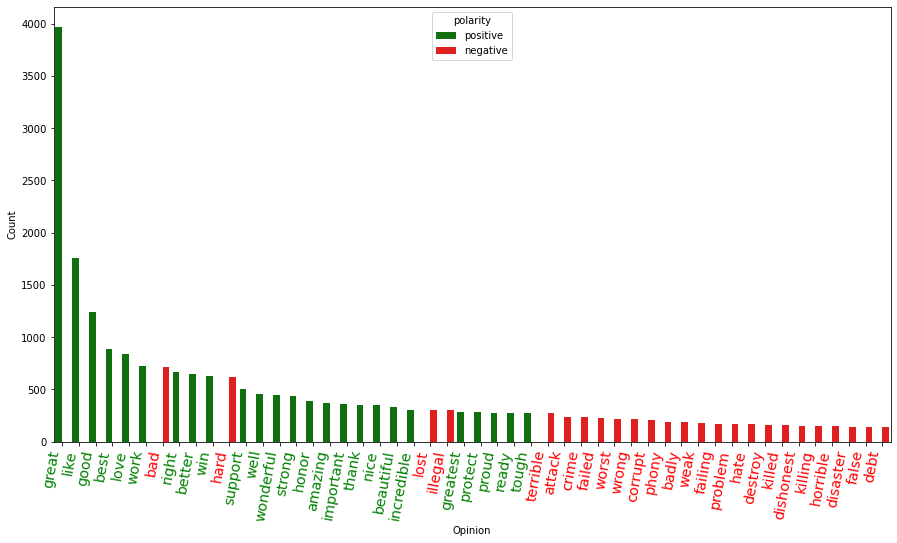

In [15]:
# plot the graph of most frequent positive and negative words

plot_opinion(rdd_positive_words_kv_count_ordered, rdd_negative_words_kv_count_ordered)

From the above graph, you can see that most of the most frequent words are positive words. The frequency of words like "great", "like", and "good" are way ahead of other words, no matter they are positive or ngeative or not. "bad" and "hard" are the only top 10 words and they are far less common than top 3 words in tweets. 
In short, we can say that Trump's tweet contents tend to deliver more positive content than negative content.

## 2. Visualize Contextual Words

I would like to know what contextual words are used in Trump's tweets to have a glimpse on what content tends to be about. I take away stop words from the tweets first to see what the meaningful words are.

In [16]:
# read stop word file

rdd_stop_words = sc.textFile("stop-words.txt")

rdd_stop_words.take(5)

['a', 'about', 'above', 'across', 'after']

In [17]:
# obtain meaningful words

contextual_words = rdd_tweets_words.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)

contextual_words.take(5)

['action', 'action', 'action', 'action', 'action']

In [18]:
# assign key and values, count the number of words used, and sort them in ascending order

contextual_words_count = contextual_words.map(lambda word: (word, 1)) \
                                         .reduceByKey(lambda a, b: a + b) \
                                         .sortBy(lambda tuple: tuple[1], ascending = False) \
                                         .take(50)

contextual_words_count

[('I', 10092),
 ('The', 5631),
 ('Trump', 4370),
 ('President', 2877),
 ('Thank', 2803),
 ('We', 2493),
 ('people', 2468),
 ('just', 2319),
 ('Great', 1859),
 ('He', 1704),
 ('A', 1517),
 ('Democrats', 1512),
 ('Obama', 1438),
 ('They', 1415),
 ('going', 1377),
 ('Donald', 1343),
 ('time', 1338),
 ('want', 1320),
 ('This', 1311),
 ('It', 1303),
 ('American', 1302),
 ('new', 1272),
 ('big', 1206),
 ('America', 1158),
 ('You', 1145),
 ('U.S.', 1133),
 ('make', 1099),
 ('If', 1095),
 ('need', 1090),
 ('New', 1083),
 ('doing', 1011),
 ('Fake', 985),
 ('country', 956),
 ('know', 939),
 ('run', 933),
 ('said', 926),
 ('China', 914),
 ('News', 913),
 ('really', 898),
 ('did', 896),
 ('job', 885),
 ('years', 884),
 ('Just', 883),
 ('So', 867),
 ('GREAT', 846),
 ('My', 837),
 ('Biden', 817),
 ('think', 805),
 ('vote', 802),
 ('United', 800)]

In [19]:
# the utility function plot_contextual_words plots a bar chart presenting top contextual words
# the parameter are list of tuples containing counts from contextual words

def plot_contextual_words(list_contextual_words):
    
    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
    
    plt.show()

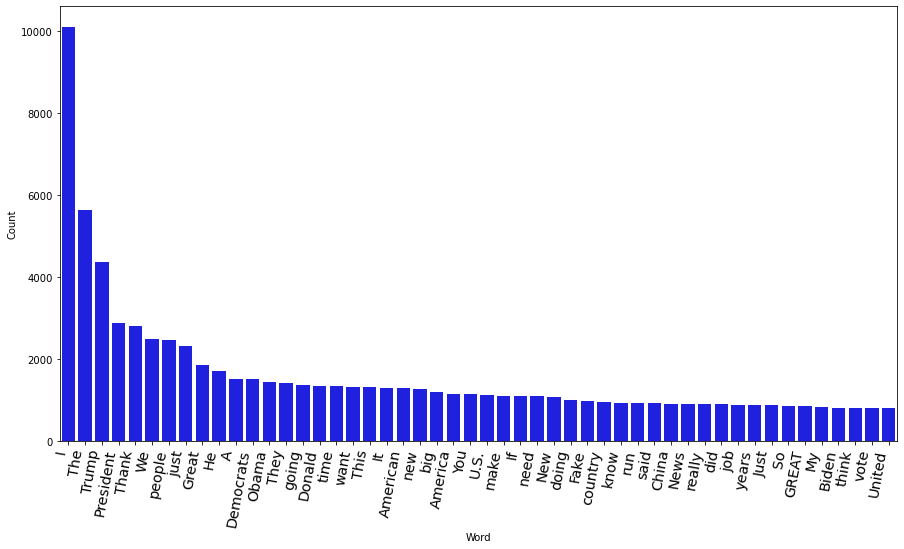

In [20]:
# plot the graph of most frequent contextual words

plot_contextual_words(contextual_words_count)

From the above graph, other than common words, most frequent contexutal words are mostly about himself such as "Trump" and "President", about people such as "We", "people", and "They", and about opponents such as "Democrats" and "Obama". 

## 3. Compute Overall Sentiment Score

In [21]:
# compute the total count of positive words minus total count of negative words

sentiment = rdd_positive_words_kv_count.map(lambda tuple: tuple[1]).sum()\
            - rdd_negative_words_kv_count.map(lambda tuple: tuple[1]).sum()

print("The sentiment score is: ", sentiment)

The sentiment score is:  11016


From the sentiment score we can deduce that the tweets of Donald Trump are overall positive.

## 4. Top Hashtags (#)

This part is to find the most popular hashtags in tweets and retweets.

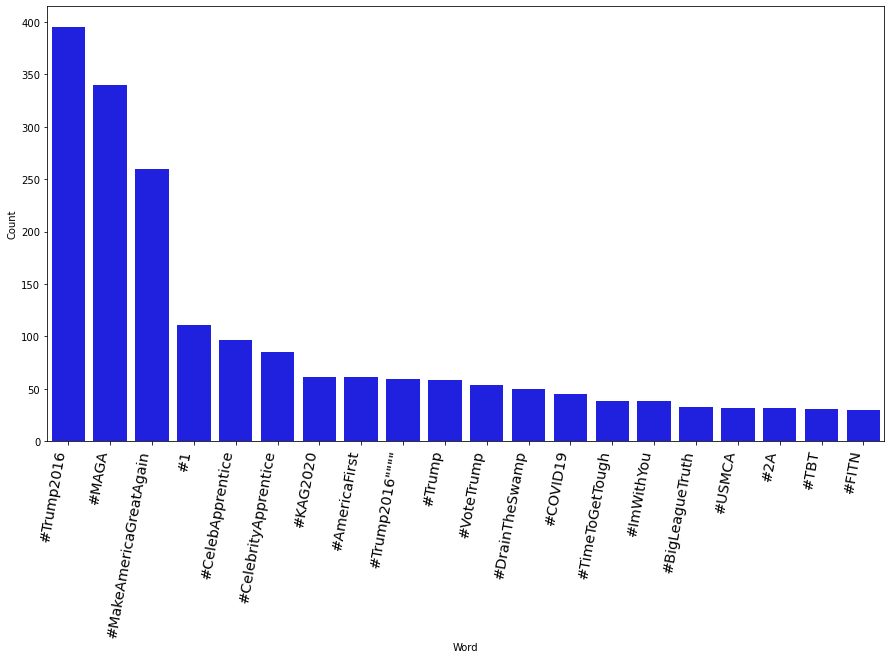

In [22]:
import re

# here we slightly modify the previous separator function to retain words with hashtags(#)

def split_with_multiple_separator_except_hashtags(string_value):
    return re.split(',| |\[|\]', string_value.strip())

# count the number of most frequent hashtags in tweets

rdd_hashtags = rdd_tweets.flatMap(split_with_multiple_separator_except_hashtags) \
                         .filter(lambda word: word != '') \
                         .filter(lambda word: word.startswith('#')) \
                         .map(lambda word: (word, 1)) \
                         .reduceByKey(lambda a, b: a + b) \
                         .sortBy(lambda tuple: tuple[1], ascending = False) 

top_hashtags = rdd_hashtags.take(20)

# plot the graph of top tweet hashtags

plot_contextual_words(top_hashtags)

From the above graph we can observe that the most common hashtags in tweets are related to his presidential campaign such as #Trump2016 and to his slogans such as #MAGA and #MakeAmericaGreatAgain.

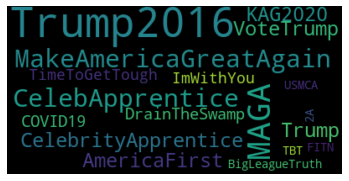

In [23]:
from wordcloud import WordCloud

# create a word cloud to visualize the hashtags in tweets

hashtags_wordcloud = str(top_hashtags).replace("'", '')

wordcloud = WordCloud(max_font_size = 50, max_words = 100).generate(hashtags_wordcloud)
 
# display the generated image

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

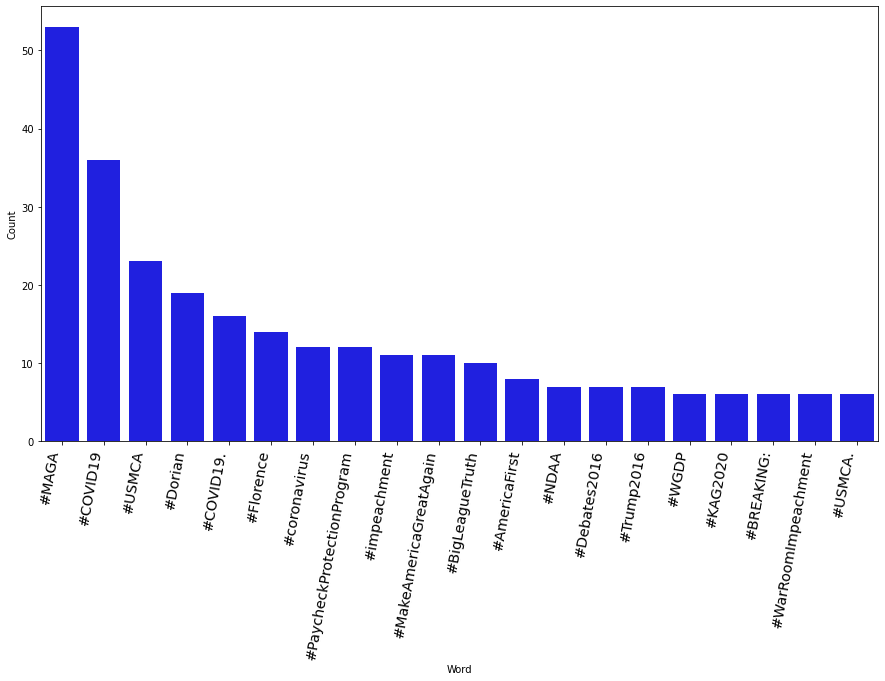

In [24]:
# count the number of most frequent hashtags in retweets

rdd_retweets_hashtags = rdd_tweets.filter(lambda line: line.startswith("RT")) \
                         .flatMap(split_with_multiple_separator_except_hashtags) \
                         .filter(lambda word: word != '') \
                         .filter(lambda word: word.startswith('#')) \
                         .map(lambda word: (word, 1)) \
                         .reduceByKey(lambda a, b: a + b) \
                         .sortBy(lambda tuple: tuple[1], ascending = False) 

top_retweets_hashtags = rdd_retweets_hashtags.take(20)

# plot the graph of top retweet hashtags

plot_contextual_words(top_retweets_hashtags)

From the above graph we can observe that the most common hashtags in retweets are related to his slogans such as #MAGA and Covid-19 such as #COVID19, #COVID19., and #coronavirus.

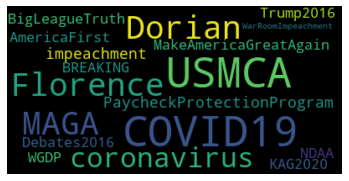

In [25]:
# create a word cloud to visualize the hashtags in retweets

retweets_hashtags_wordcloud = str(top_retweets_hashtags).replace("'", '')

wordcloud = WordCloud(max_font_size = 50, max_words = 100).generate(retweets_hashtags_wordcloud)
 
# display the generated image

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

In [26]:
# create 2 lists of most common hashtags from tweets and retweets

a = []
b = []

for i in range(0, len(top_hashtags)):
    a.append(top_hashtags[i][0])
    b.append(top_retweets_hashtags[i][0])

In [27]:
# combine the 2 lists into a table

df = pd.DataFrame({
    
    'Top Tweet Hashtags': a,
    'Top Retweet Hashtags': b
})

df

,Top Tweet Hashtags,Top Retweet Hashtags
0,#Trump2016,#MAGA
1,#MAGA,#COVID19
2,#MakeAmericaGreatAgain,#USMCA
3,#1,#Dorian
4,#CelebApprentice,#COVID19.
5,#CelebrityApprentice,#Florence
6,#KAG2020,#coronavirus
7,#AmericaFirst,#PaycheckProtectionProgram
8,"#Trump2016""""""""",#impeachment
9,#Trump,#MakeAmericaGreatAgain


The table shows a better comparison of those hashtags. The hashtags of tweets are more about things around himself and rhetoric while those of retweets are more about public policies.

## 5. Top References (@)

This part is to find the most popular references in tweets and retweets.

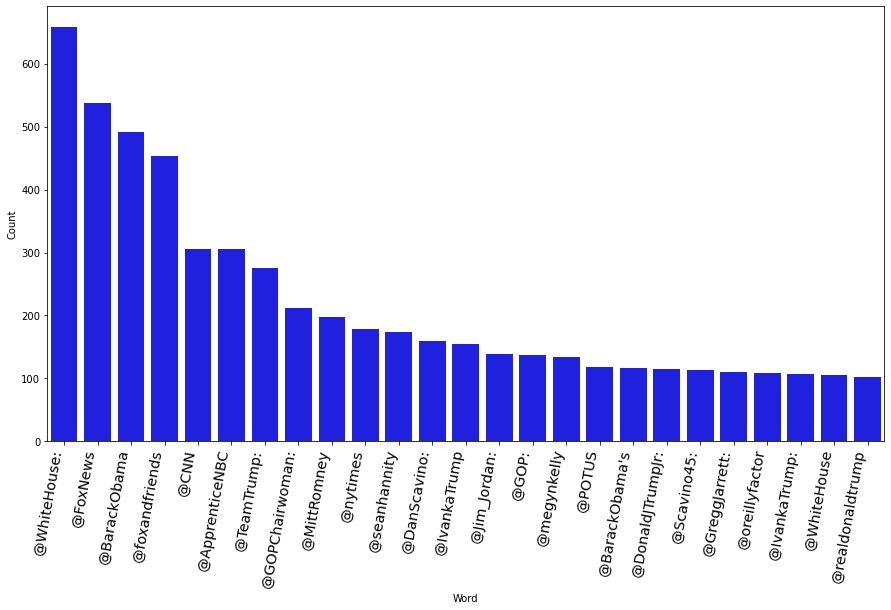

In [28]:
# count the number of most frequent references in tweets other than himself

rdd_references = rdd_tweets_words.filter(lambda word: word.startswith('@')) \
                                 .filter(lambda word: word != '@realDonaldTrump') \
                                 .filter(lambda word: word != '@realDonaldTrump:') \
                                 .filter(lambda word: word != '@realDonaldTrump.') \
                                 .map(lambda word: (word, 1)) \
                                 .reduceByKey(lambda a, b: a + b) \
                                 .sortBy(lambda tuple: tuple[1], ascending = False) 

top_references = rdd_references.take(25)

# plot the graph of top tweet references

plot_contextual_words(top_references)

From the above graph we can see that the most common references are those around Trump such as @WhiteHouse, @FoxNews, and @CNN, and his opponents such as @BarackObama.

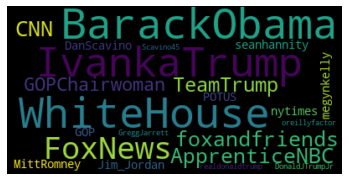

In [29]:
# create a word cloud to visualize the references in tweets

references_wordcloud = str(top_references).replace("'", '')

wordcloud = WordCloud(max_font_size = 50, max_words = 100).generate(references_wordcloud)
 
# display the generated image

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

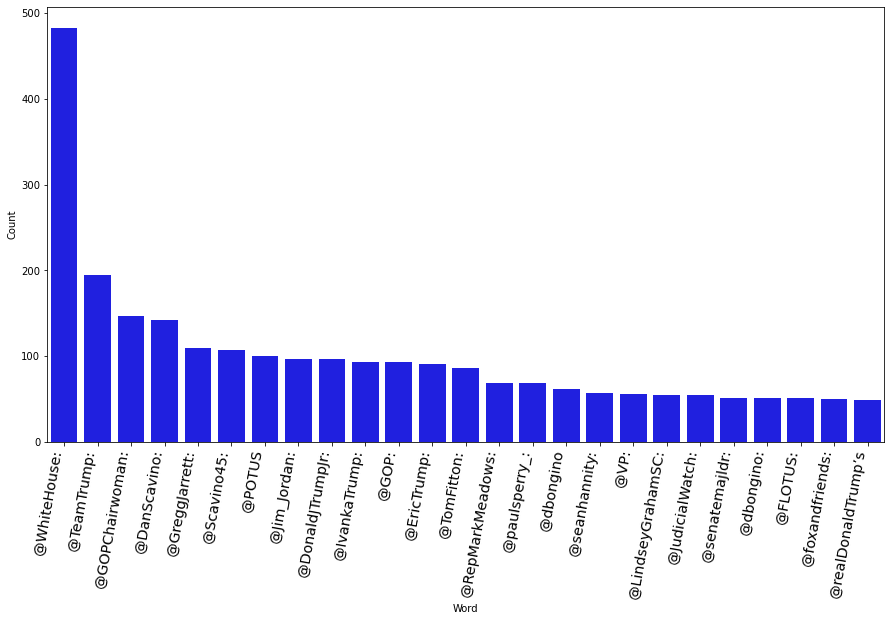

In [30]:
# count the number of most frequent references in retweets other than himself

rdd_retweets_references = rdd_tweets.filter(lambda line: line.startswith("RT")) \
                         .flatMap(split_with_multiple_separator) \
                         .filter(lambda word: word != '') \
                         .filter(lambda word: word.startswith('@')) \
                         .filter(lambda word: word != '@realDonaldTrump') \
                         .filter(lambda word: word != '@realDonaldTrump:') \
                         .filter(lambda word: word != '@realDonaldTrump.') \
                         .map(lambda word: (word, 1)) \
                         .reduceByKey(lambda a, b: a + b) \
                         .sortBy(lambda tuple: tuple[1], ascending = False) 

top_retweets_references = rdd_retweets_references.take(25)

# plot the graph of top retweet references

plot_contextual_words(top_retweets_references)

From the above graph we obtain a similar tendency of result, i.e. the most common references are those around him such as @TeamTrump: and @GOP Chairwoman: but different people.

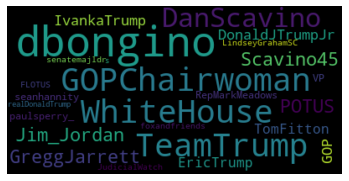

In [31]:
# create a word cloud to visualize the references in retweets

retweet_references_wordcloud = str(top_retweets_references).replace("'", '')

wordcloud = WordCloud(max_font_size = 50, max_words = 100).generate(retweet_references_wordcloud)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

In [32]:
# create 2 lists of most common references from tweets and retweets

c = []
d = []

for i in range(0, len(top_references)):
    c.append(top_references[i][0])
    d.append(top_retweets_references[i][0])

In [33]:
# combine the 2 lists into a table

df2 = pd.DataFrame({
    
    'Top Tweet References': c,
    'Top Retweet References': d
})

df2

,Top Tweet References,Top Retweet References
0,@WhiteHouse:,@WhiteHouse:
1,@FoxNews,@TeamTrump:
2,@BarackObama,@GOPChairwoman:
3,@foxandfriends,@DanScavino:
4,@CNN,@GreggJarrett:
5,@ApprenticeNBC,@Scavino45:
6,@TeamTrump:,@POTUS
7,@GOPChairwoman:,@Jim_Jordan:
8,@MittRomney,@DonaldJTrumpJr:
9,@nytimes,@IvankaTrump:


The table shows a better comparison of those references. Those in tweets and retweets are slightly different: the former tends to be more related to the media and his opponents and the latter tends to be more related to those working with or for him. 